<div style="text-align: center;">
    <h1>FetalAI: USING MACHINE LEARNING TO PREDICT AND MONITOR FETAL HEALTH</h1>
    <h2>Project by: Abhishek Kumar Sinha</h2>
    <h3>Guide: Indra Prakash </h3>
    <h4> SmartBridge</h4>
</div>


# 1.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings(action='ignore')


# 1.2 Read the Dataset

In [2]:
data = pd.read_csv("fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.shape

(2126, 22)

# 2.Data Preparation

The Machine Learning model cannot be trained on the imported data directly. The dataset might
have randomness, we might have to clean the dataset and bring it in the right form. This activity
involves the following steps: <br> <br>
● Handling Missing Values <br>
● Encoding data <br>
● Handling Imbalance Data

## 2.1 Handling Missing Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [41]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Handling Categorical Data

### Handling Imbalance Data

In [6]:
# Evaluating the target and finding out if our data is imbalanced or not
data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

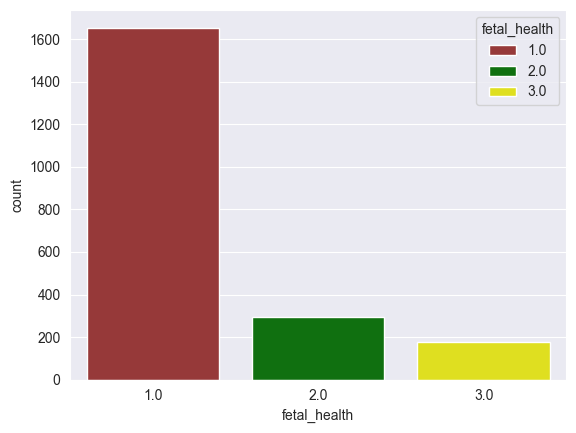

In [7]:
colours = ["brown","green","yellow"]
sns.countplot(data= data, x ="fetal_health",hue="fetal_health", palette= colours)

# 3. Exploratory Data Analysis

## 3.1 Discriptive statistical analysis

Descriptive analysis is to study the basic features of data with the statistical process. Here
pandas has a worthy function called describe. With this describe function we can understand
the unique, top and frequent values of categorical features. And we can find mean, std, min,
max and percentile values of continuous features.

In [8]:
data.describe().T
data.nunique()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [9]:
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

## 3.2 Visual Analysis

Visual analysis is the process of using visual representations, such as charts, plots, and graphs,
to explore and understand data. It is a way to quickly identify patterns, trends, and outliers in the
data, which can help to gain insights and make informed decisions.

### 3.2.1 Univariate Analysis

Univariate analysis is understanding the data with a single feature. Here we
have displayed different graphs such as histogram and boxplot.
The Seaborn and matplotlib package provides a wonderful functions histogram and boxplot.
With the help of histogram and boxplot, we can find the distribution of the feature. To make
multiple graphs in a single plot, we use subplot.

array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

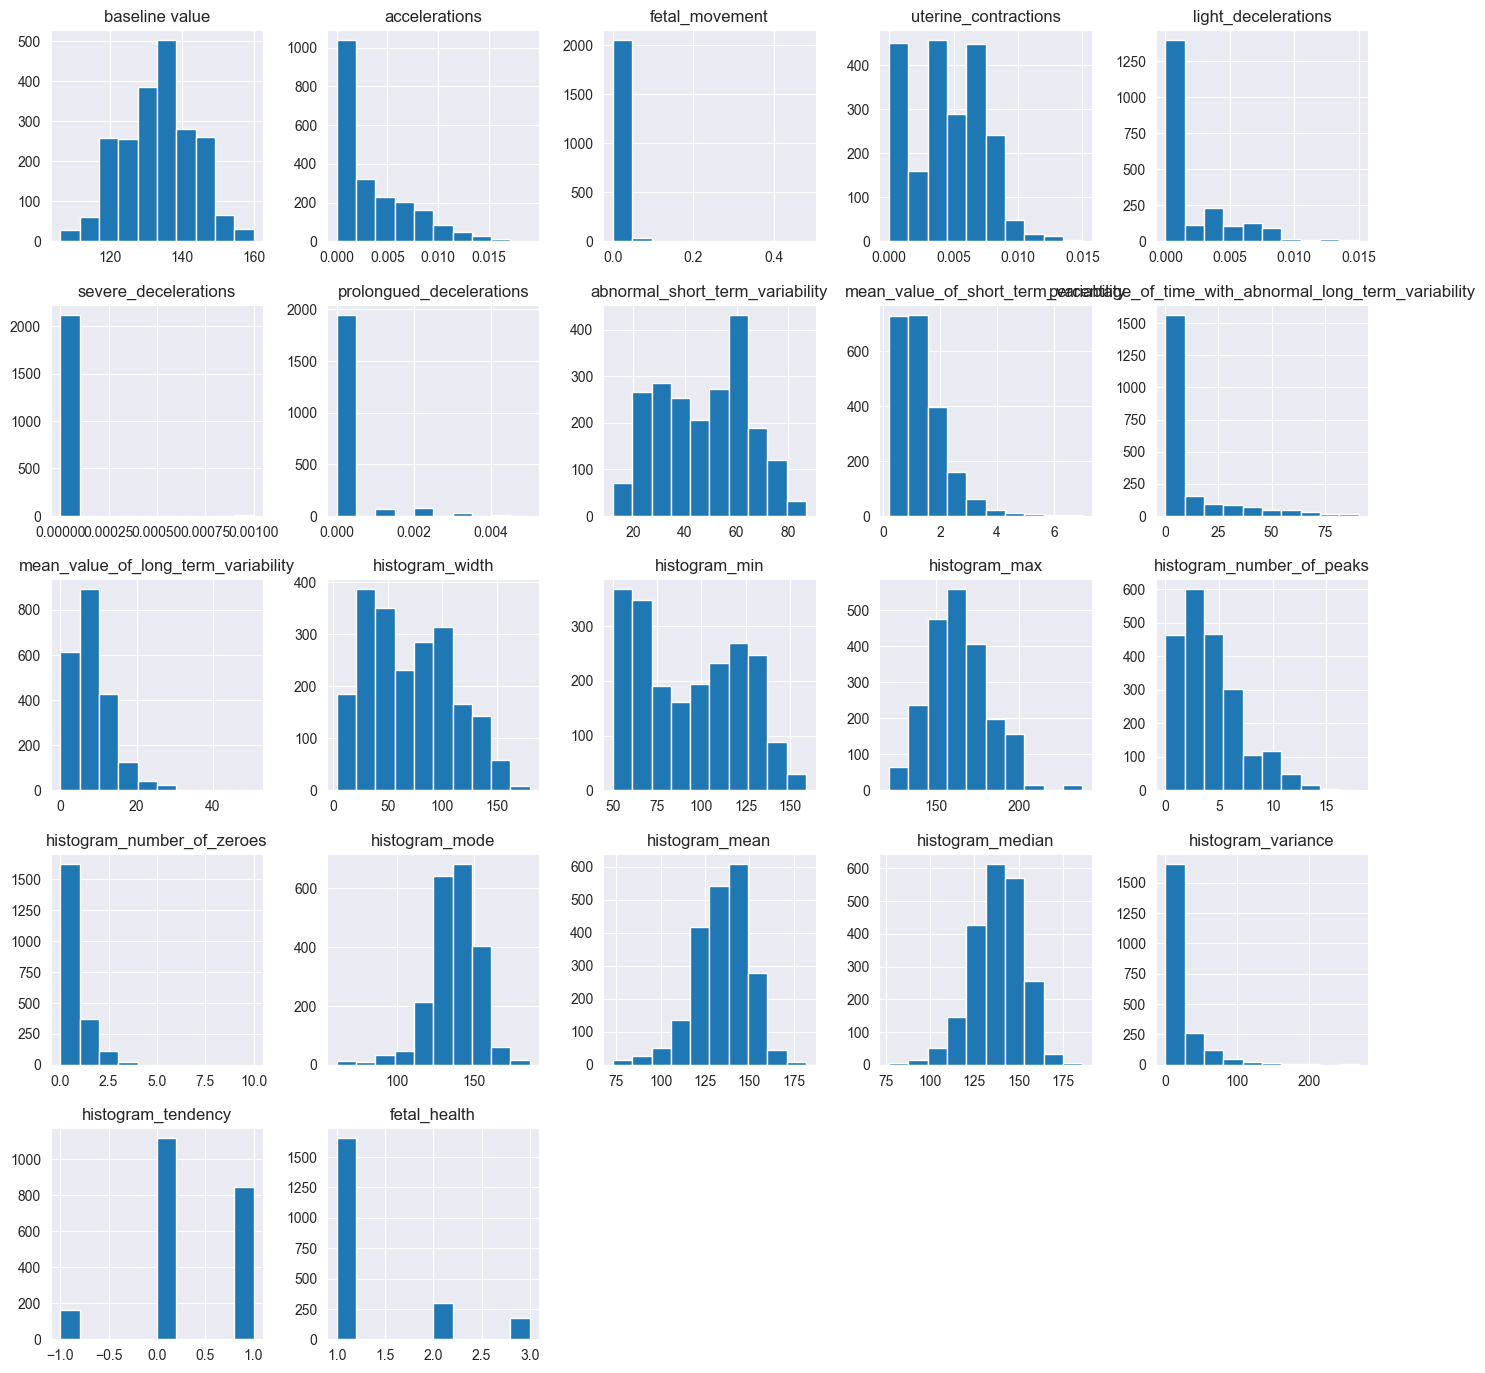

In [10]:
data.hist(figsize=(17,17), layout=(5,5), sharex = False)

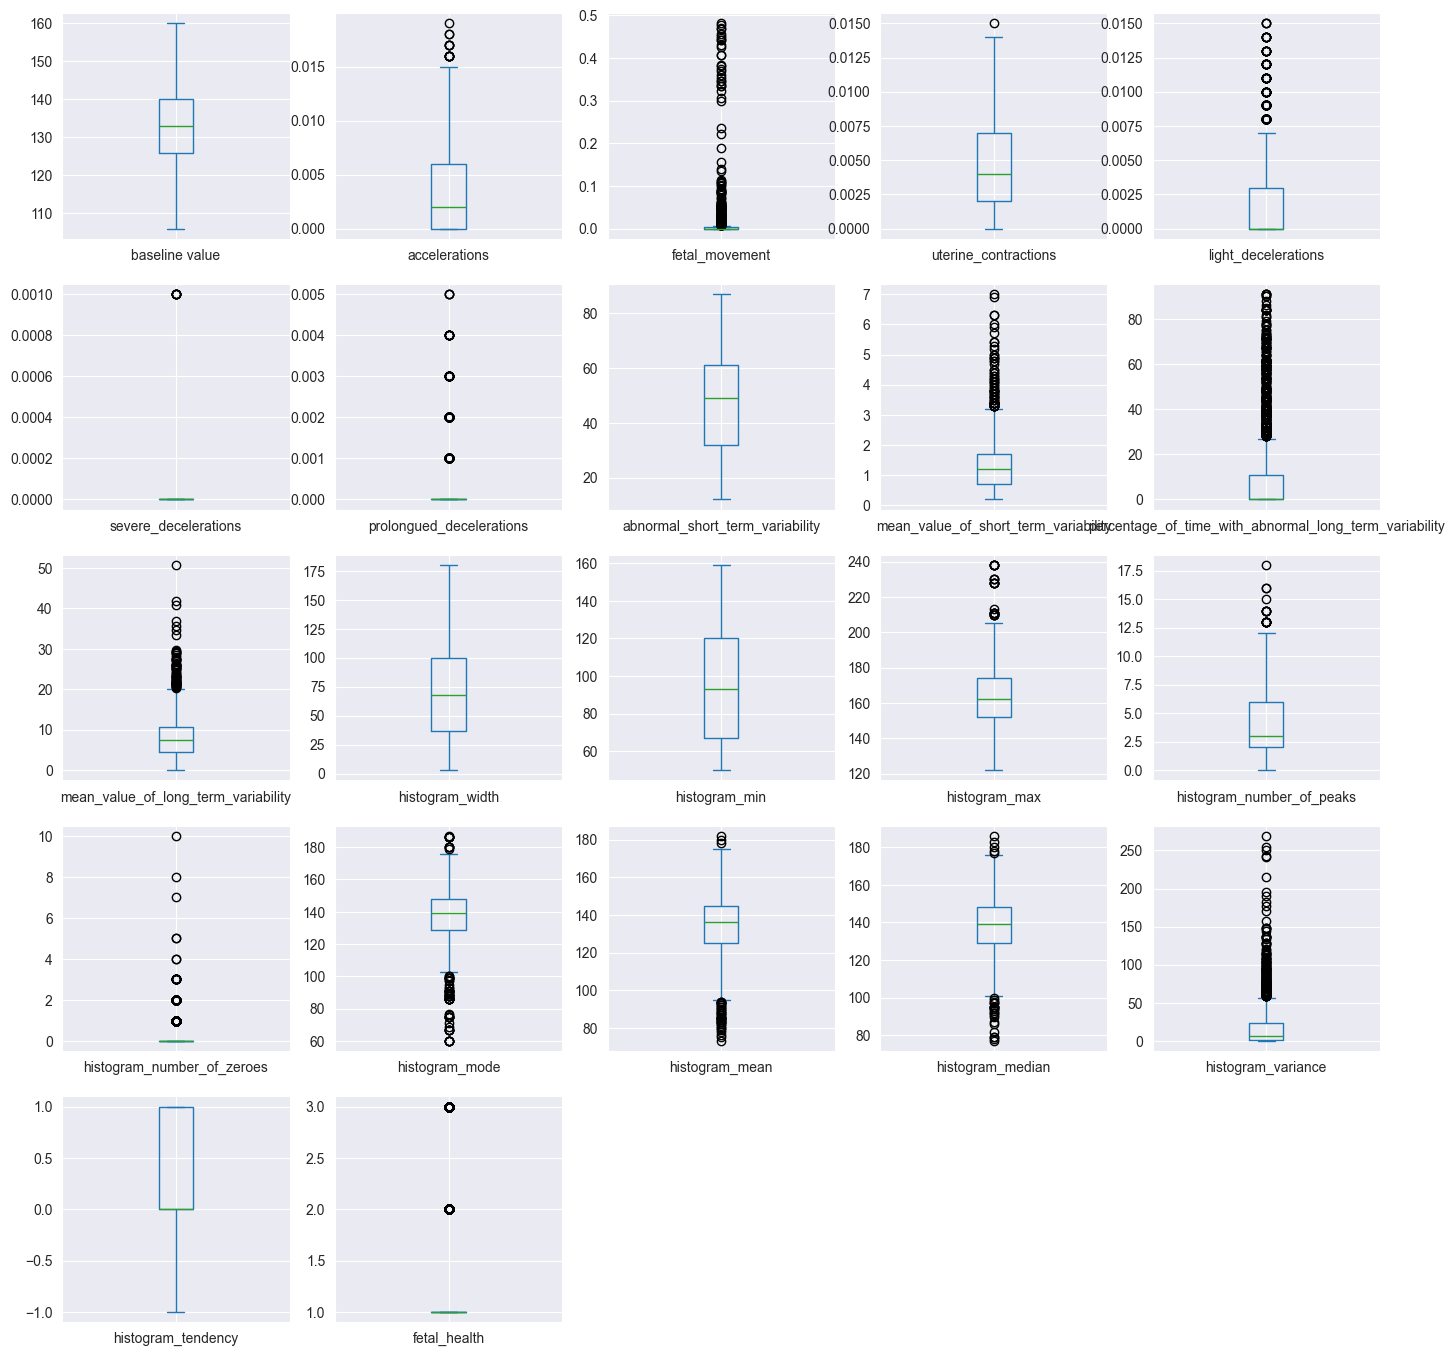

In [11]:
data.plot(kind = 'box', figsize=(17,17), layout=(5,5), sharex = False, subplots= True);

### 3.2.2 Bivariate Analysis

<Axes: xlabel='fetal_movement', ylabel='fetal_health'>

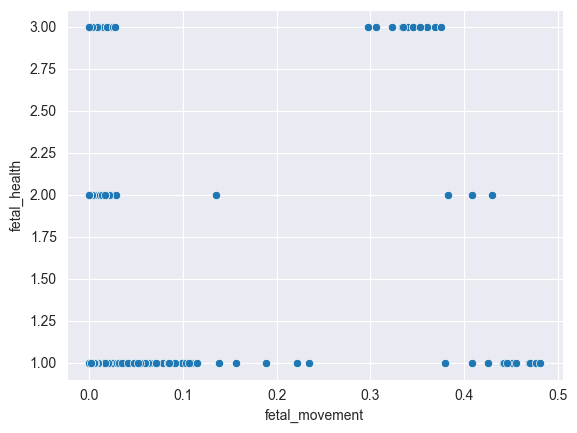

In [12]:
sns.scatterplot(data=data, x="fetal_movement", y="fetal_health")

### 3.2.3 Multivariate Analysis

Multivariate analysis is to find the relation between multiple features. Here we
have used correlation matrix.

<Axes: >

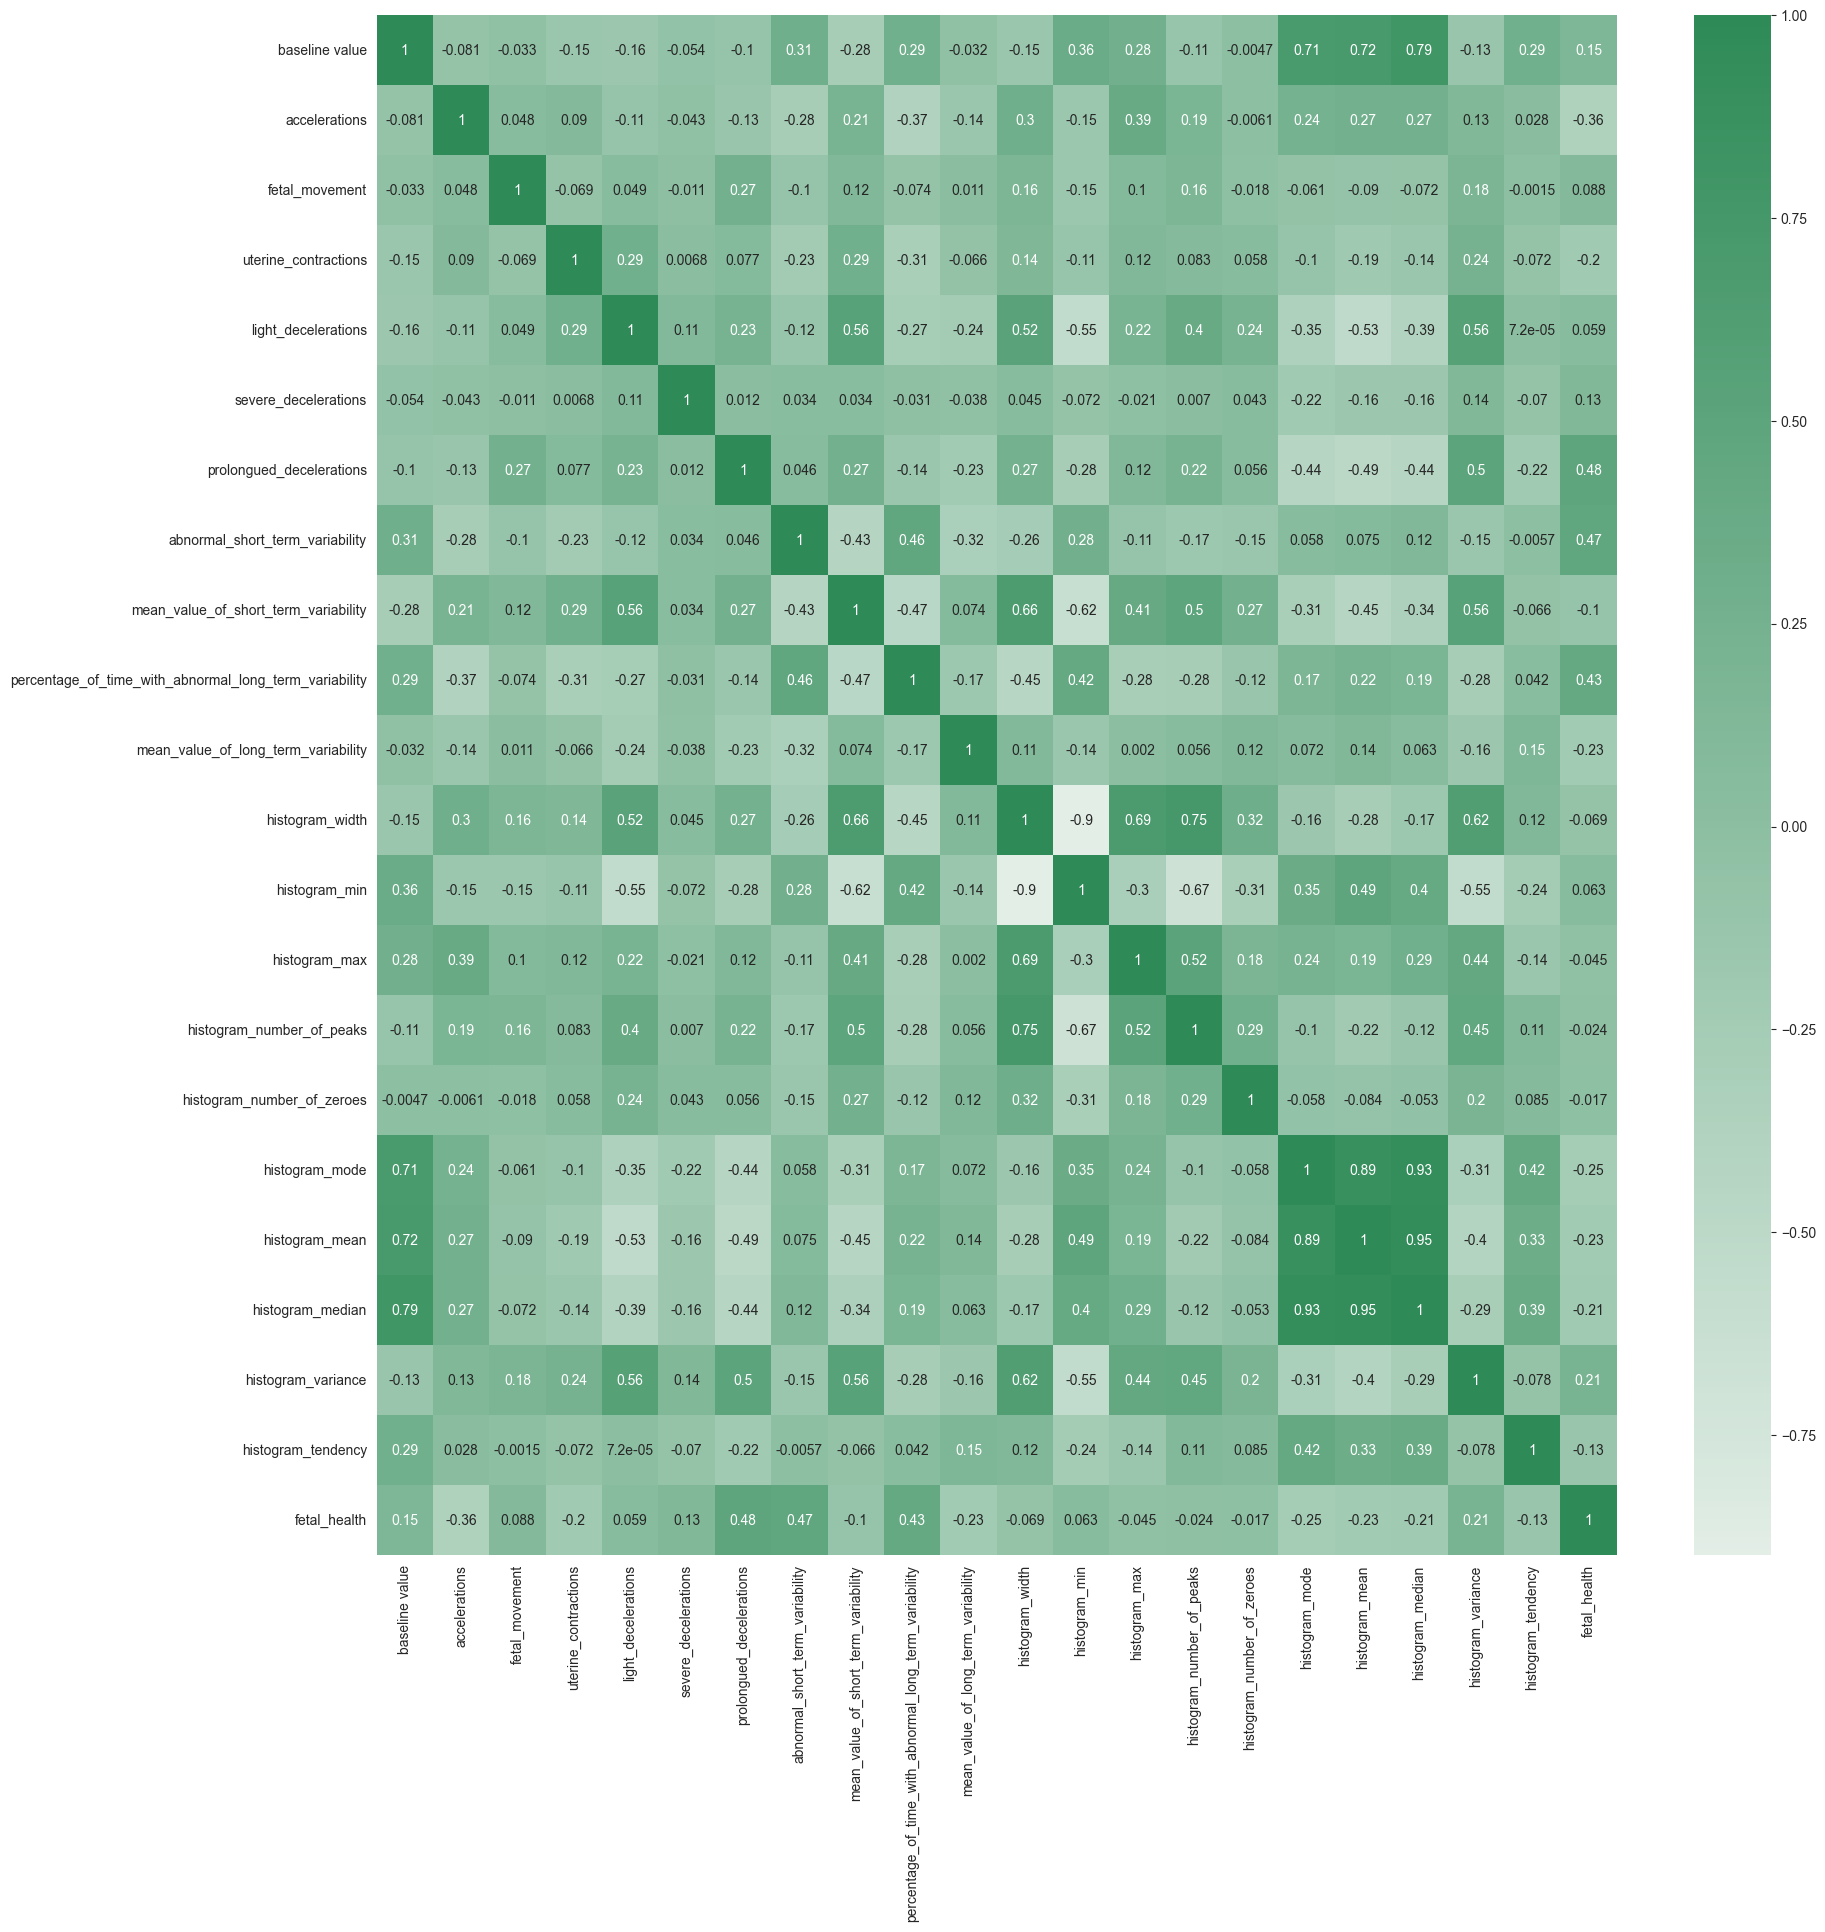

In [13]:
# Correlation Matrix
corrmat = data.corr()
plt.figure(figsize=(20,20))

cmap = sns.light_palette("seagreen",as_cmap = True)

sns.heatmap(corrmat, annot = True, cmap=cmap, center = 0)

## 3.3 Feature Selection

In [14]:
data.drop(columns=["histogram_mean"], axis=1, inplace=True)

In [15]:
data.corr()["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [16]:
new_data = data.loc[:,["prolongued_decelerations", "abnormal_short_term_variability", 
                       "percentage_of_time_with_abnormal_long_term_variability", "histogram_variance",
                      "histogram_median", "mean_value_of_long_term_variability",
                      "histogram_mode","accelerations"]]

In [17]:
new_data.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,histogram_median,mean_value_of_long_term_variability,histogram_mode,accelerations
0,0.0,73.0,43.0,73.0,121.0,2.4,120.0,0.000
1,0.0,17.0,0.0,12.0,140.0,10.4,141.0,0.006
2,0.0,16.0,0.0,13.0,138.0,13.4,141.0,0.003
3,0.0,16.0,0.0,13.0,137.0,23.0,137.0,0.003
4,0.0,16.0,0.0,11.0,138.0,19.9,137.0,0.007


## 3.4 Scaling the Data

In [18]:
X = new_data
y = data["fetal_health"]

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scaled.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,histogram_median,mean_value_of_long_term_variability,histogram_mode,accelerations
0,0.0,0.813333,0.472527,0.271375,0.403670,0.047337,0.472441,0.000000
1,0.0,0.066667,0.000000,0.044610,0.577982,0.205128,0.637795,0.315789
2,0.0,0.053333,0.000000,0.048327,0.559633,0.264300,0.637795,0.157895
3,0.0,0.053333,0.000000,0.048327,0.550459,0.453649,0.606299,0.157895
4,0.0,0.053333,0.000000,0.040892,0.559633,0.392505,0.606299,0.368421


## 3.5 Splitting data into train and test

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=10)

X_train.shape, X_test.shape

((1488, 8), (638, 8))

## 3.6 Applying SMOTE for balancing the data

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [22]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [23]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({1.0: 1158, 2.0: 201, 3.0: 129})
After SMOTE: Counter({1.0: 1158, 2.0: 1158, 3.0: 1158})


After applying the SMOTE, the dataset is balanced. Now we will again train the model atfer balancing the datset to check the accuracy.

# 4. Model Building

Training model after applying SMOTE

## Training the model in multiple algorithm

Now our data is cleaned and it’s time to build the model. We can train our data on different
algorithms. For this project we are applying three classification algorithms. The best model is
saved based on its performance.

## 4.1 Random Forest Model

A function named randomForest is created and train and test data are passed as the
parameters. Inside the function, the RandomForestClassifier algorithm is initialized and training
data is passed to the model with the .fit() function. Test data is predicted with .predict() function
and saved in a new variable. For evaluating the model, a confusion matrix and classification
report is done.

In [24]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train_smote, y_train_smote)
predictions = RF_model.predict(X_test)
print(accuracy_score(y_test,predictions))
pd.crosstab(y_test, predictions)

0.945141065830721


col_0,1.0,2.0,3.0
fetal_health,,,
1.0,480,13,4
2.0,13,79,2
3.0,2,1,44


In [25]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train_smote, y_train_smote)
predictions = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test,predictions)
print(RF_accuracy)

0.9435736677115988


For the amount of training data is:  3474
Accuracy of Random Forest Classifier 0.9435736677115988


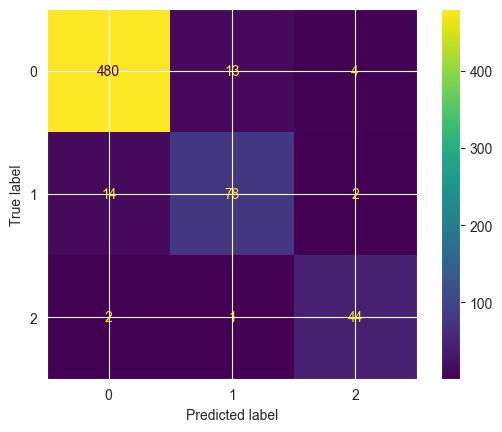

In [26]:
size = y_train_smote.size
print("For the amount of training data is: ",size)
print("Accuracy of Random Forest Classifier", RF_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
sm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## 4.2 Decision Tree

A function named decisionTree is created and train and test data are passed as the parameters.
Inside the function, DecisionTreeClassifier algorithm is initialized and training data is passed to
the model with the .fit() function. Test data is predicted with .predict() function and saved in a
new variable. For evaluating the model, a confusion matrix and classification report is done.

In [27]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_smote, y_train_smote)
predictions = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test,predictions)
print(DT_accuracy)

0.9310344827586207


For the amount of training data is:  3474
Accuracy of Decisoin Tree Classifier:  0.9310344827586207


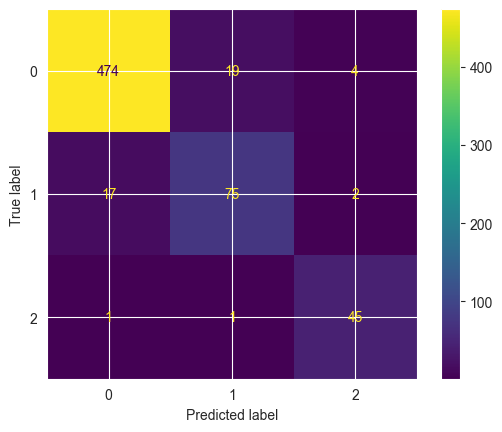

In [28]:
print("For the amount of training data is: ",size)
print("Accuracy of Decisoin Tree Classifier: ", DT_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
sm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## 4.3 Logistic Regression

A function named LogisticRegression() is created and train and test data are passed as the
parameters. Inside the function, LogisticRegression algorithm is initialized and training data is
passed to the model with the .fit() function. Test data is predicted with .predict() function and
saved in a new variable. For evaluating the model, a confusion matrix and classification report is
done.

In [29]:
LR_model = LogisticRegression(max_iter=50000)
LR_model.fit(X_train_smote, y_train_smote)
predictions = LR_model.predict(X_test)
LR_accuracy = accuracy_score(y_test,predictions)
print(LR_accuracy)

0.8119122257053292


For the amount of training data is:  3474
Accuracy of Logistic Regression:  0.8119122257053292


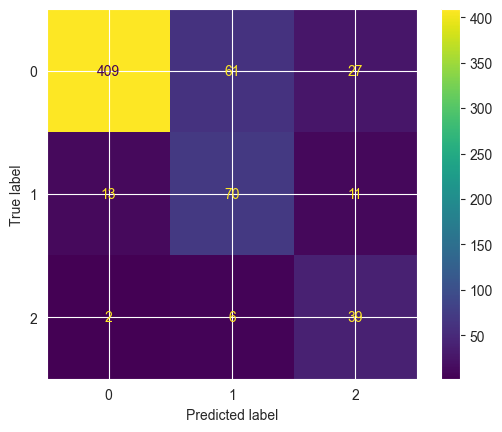

In [30]:
print("For the amount of training data is: ",size)
print("Accuracy of Logistic Regression: ", LR_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
sm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## 4.4 K-Nearest Neighbors

A function named KNeighborsClassifier() is created and train and test data are passed as the
parameters. Inside the function, KNeighbors algorithm is initialized and training data is passed
to the model with the .fit() function. Test data is predicted with .predict() function and saved in a
new variable. For evaluating the model, a confusion matrix and classification report is done.

In [31]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_smote, y_train_smote)
predictions = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test,predictions)
print(KNN_accuracy)

0.9075235109717869


For the amount of training data is:  3474
Accuracy of KNeighbors Classifier: :  0.9075235109717869


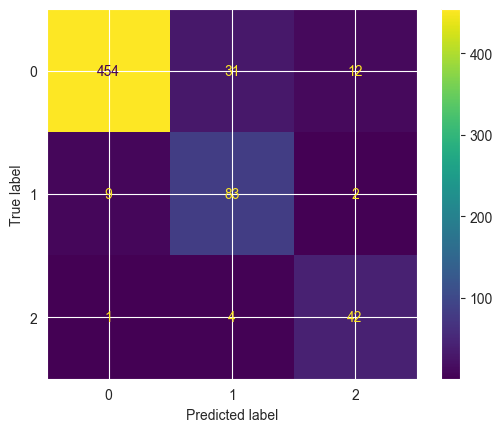

In [32]:
print("For the amount of training data is: ",size)
print("Accuracy of KNeighbors Classifier: : ", KNN_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
sm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

# 4.5 Testing the model

In [33]:
RF_model.predict([[0.001,26,0,41,132,8.2,133,0.005]])

array([1.])

In [34]:
RF_model.predict([[0.001,34,0,116,131,12.4,99,0.002]])

array([2.])

In [35]:
RF_model.predict([[0,87,71.0,0,125,3.4,124,0]])

array([3.])

# 5. Perforamnce Testing

## 5.1 Testing model with multiple evaluation metrics

Multiple evaluation metrics means evaluating the model's performance on a
test set using different performance measures. This can provide a more
comprehensive understanding of the model's strengths and weaknesses. We
are using evaluation metrics for classification tasks including accuracy,
precision, recall, support and F1-score.

##  Comparinig the model

In [36]:
import pandas as pd

names = ['Random Forest Classifier', 'Decision Tree Classifier', 
         'Logistic Regression', 'K Neighbors Classifier']
scores = [RF_accuracy, DT_accuracy, LR_accuracy, KNN_accuracy]

df = pd.DataFrame()
df['Name'] = names
df['Score'] = scores

df


,Name,Score
0,Random Forest Classifier,0.943574
1,Decision Tree Classifier,0.931034
2,Logistic Regression,0.811912
3,K Neighbors Classifier,0.907524


In [37]:
CM = sns.light_palette("red", as_cmap=True)
C = df.style.background_gradient(cmap=CM)
C

,Name,Score
0,Random Forest Classifier,0.943574
1,Decision Tree Classifier,0.931034
2,Logistic Regression,0.811912
3,K Neighbors Classifier,0.907524


## 5.2 Bar plot for model performance

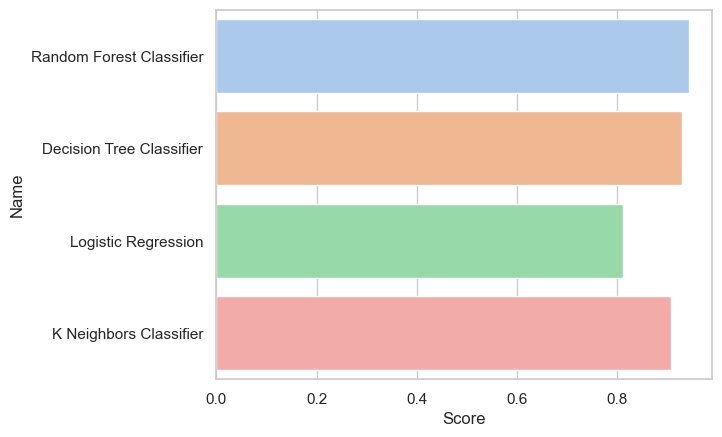

In [38]:
colors = sns.color_palette("pastel", len(df))

sns.set(style="whitegrid")
ax = sns.barplot(y='Name', x='Score', data=df, palette=colors)


After comparing the model with the help of bar plot. We came to a conclusion that
Random Forest is showing the highest accuracy and is performing well.

# 6. Model Deployment

##  Save the best model

Saving the best model after comparing its performance using different evaluation metrics means
selecting the model with the highest performance and saving its weights and configuration. This
can be useful in avoiding the need to retrain the model every time it is needed and also to be
able to use it in the future.

In [39]:
import pickle
pickle.dump(RF_model, open('fetalAI_model.pkl','wb'))